In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data can be available in any forms be it numerical, boolean or even text form. In Natural Language Processing (NLP), we deal with the text data.
Text data is one of the most unstructured forms of available data thereforebefore using this data for analysis or predictions,processing the data is very important.

In order to prepare our model on the text dataset we need to perform text prepocessing. Some of the steps in text preprocessing are: - 
- Removing punctuations
- Removing stop words
- Lower Casing
- Tokenization
- Stemming

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [9]:
pd.set_option('display.max_colwidth',-1)
df = df[['v1','v2']]
df.head()

C:\Users\Predator\AppData\Local\Temp/ipykernel_6028/3452657604.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Cleaning the data

Removing the puncutations from the text

In [10]:
import string

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
"".join([i for i in "Hello, Babin Joshi." if i not in string.punctuation])

'Hello Babin Joshi'

In [18]:
def remove_punctuation(text):
    text = "".join([i for i in text if i not in string.punctuation])
    return text

In [19]:
df['clean_msg'] = df['v2'].apply(lambda x: remove_punctuation(x))

In [20]:
df

,v1,v2,clean_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free


In [21]:
df = df.drop(['v2'],axis=1)

In [22]:
df.head()

,v1,clean_msg
0,ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives around here though


### Lowering the text case

In [24]:
df['clean_msg'][0].lower()

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [25]:
df['clean_msg'] = df['clean_msg'].apply(lambda x:x.lower())

In [26]:
df.head()

,v1,clean_msg
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives around here though


### Creating tokens from sentences

In [29]:
df['msg_tokenized'] = df['clean_msg'].str.split( )

In [30]:
df

,v1,clean_msg,msg_tokenized
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]"
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å£750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]"
5568,ham,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]"
5569,ham,pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]"
5570,ham,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]"


### Removing Stop Words

Stop words are commonly used words which do not add any importance to the analysis. These words carry less or no meaning. 

In [32]:
import nltk

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Predator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

Some of the available stopwords present in the nltk library are:-

In [38]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Removing such stop words from the tokenized message

In [40]:
abc = ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
abc

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [42]:
for word in abc:
    if word not in stopwords:
        print(word)

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [44]:
df['msg_tokenized'][0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [46]:
def remove_stop_words(msg_tokenized):
    tokens = []
    stopwords = nltk.corpus.stopwords.words('english')
    for token in msg_tokenized:
        if token not in stopwords:
            tokens.append(token)
    return tokens

In [48]:
print(remove_stop_words(['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']))

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']


In [49]:
df['msg_wo_stopwords'] = df['msg_tokenized'].apply(lambda x: remove_stop_words(x))

In [50]:
df

,v1,clean_msg,msg_tokenized,msg_wo_stopwords
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å£750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]","[2nd, time, tried, 2, contact, u, u, å£750, pound, prize, 2, claim, easy, call, 087187272008, now1, 10p, per, minute, btnationalrate]"
5568,ham,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,ham,pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pity, mood, soany, suggestions]"
5570,ham,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]","[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, us, free]"


### Stemming

Sometimes, we have multiple words that have the same meaning but have slightly different spelling due to sentence context. It is also known as text standardization step where the words are stemmed or diminished into their rooot/base form. For example, words like 'love', 'loving', 'loved', 'lovely' all essentially means the same thing and hence are reduced to their base form 'eat'.

In [51]:
from nltk.stem.porter import PorterStemmer

In [74]:
porter_stemmer = PorterStemmer()
porter_stemmer.stem('loved')

'love'

In [80]:
def stemming(tokens):
    porter_stemmer = PorterStemmer()
    stem_tokens = [porter_stemmer.stem(token) for token in tokens]
    return stem_tokens    

In [81]:
df['msg_stemmed'] = df['msg_wo_stopwords'].apply(lambda x: stemming(x))

In [82]:
df

,v1,clean_msg,msg_tokenized,msg_wo_stopwords,msg_stemmed
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å£750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]","[2nd, time, tried, 2, contact, u, u, å£750, pound, prize, 2, claim, easy, call, 087187272008, now1, 10p, per, minute, btnationalrate]","[2nd, time, tri, 2, contact, u, u, å£750, pound, prize, 2, claim, easi, call, 087187272008, now1, 10p, per, minut, btnationalr]"
5568,ham,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]"
5569,ham,pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
5570,ham,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]","[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, us, free]","[guy, bitch, act, like, id, interest, buy, someth, els, next, week, gave, us, free]"


### Lemmatization

It stems the word but makes sure that it does not lose its meaning. It has a predefined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

In [83]:
from nltk.stem import WordNetLemmatizer

In [84]:
wordnet_lemmatizer = WordNetLemmatizer()

In [97]:
def lemmatizer(tokens):
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(word) for token in tokens]
    return lemmatized_tokens

In [98]:
df['msg_lemmatized'] = df['msg_wo_stopwords'].apply(lambda x: lemmatizer(x))

In [99]:
df

,v1,clean_msg,msg_tokenized,msg_wo_stopwords,msg_stemmed,msg_lemmatized
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat]"
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[wat, wat, wat, wat, wat, wat]"
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat]"
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[wat, wat, wat, wat, wat, wat, wat, wat, wat]"
4,ham,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[wat, wat, wat, wat, wat, wat, wat, wat]"
...,...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å£750, pound, prize, 2, claim, is, easy, call, 087187272008, now1, only, 10p, per, minute, btnationalrate]","[2nd, time, tried, 2, contact, u, u, å£750, pound, prize, 2, claim, easy, call, 087187272008, now1, 10p, per, minute, btnationalrate]","[2nd, time, tri, 2, contact, u, u, å£750, pound, prize, 2, claim, easi, call, 087187272008, now1, 10p, per, minut, btnationalr]","[wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat]"
5568,ham,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]","[wat, wat, wat, wat, wat, wat]"
5569,ham,pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[wat, wat, wat, wat]"
5570,ham,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]","[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, us, free]","[guy, bitch, act, like, id, interest, buy, someth, els, next, week, gave, us, free]","[wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat, wat]"


### After all the text preprocessing steps are performed, the final acquired data are converted to the numeric form using Bag of Words or Tf-idf.

## Bag of Words

Bag of words helps convert the text into numerical representation such that the same can be used to train models using machine learning algorithms. The key steps of fitting a bag-of-words model are:-
- Create a vocabulary indices of words or tokens from the entire set of documents. The vocabulary indices can be created in alphabetical order.
- Construct the numerical feature vector for each document that represents how frequent each word appears in different documents. The feature vector representing each will be sparse in nature as the words in each document will represent only a small subset of words out of all words (bag-of-words) present in entire set of documents.

Bag of Words differs form One hot encoding in a way that, instead of vector of boolean values, it uses a vector of word frequencies. But Bag of words approach totally ignores the order of wrods and simply usese word counts as their basis. For each word in the post, its occurence is counted and noted in a vector. Not surprisingly, this step is also called vectorization. The vector is typicallly huge as it contains many elements as words occur in the whole dataset.

### Creating Bag of Words using sklearn

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

The CountVectorizer converts the collection of text documents to a matrix of token counts.

In [116]:
count_vectorizer = CountVectorizer(lowercase=True,stop_words='english')
content = [
    'How to format my hard disk',
    'Hard disk format problems',
    'My hard disk is not working',
    'I forgot my external hard disk'
]
X = count_vectorizer.fit_transform(content)

In [117]:
count_vectorizer.get_feature_names()

['disk', 'external', 'forgot', 'format', 'hard', 'problems', 'working']

In [118]:
X.toarray()

array([[1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [121]:
pd.DataFrame(X.toarray(), columns = count_vectorizer.get_feature_names(), index=content)

,disk,external,forgot,format,hard,problems,working
How to format my hard disk,1,0,0,1,1,0,0
Hard disk format problems,1,0,0,1,1,1,0
My hard disk is not working,1,0,0,0,1,0,1
I forgot my external hard disk,1,1,1,0,1,0,0


### Bag of n-grams

The bag of n-grams is a natural extension of bag of words. N-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document. 

<b>n-grams</b> can be classified into following types, depending on the value that 'n' takes.

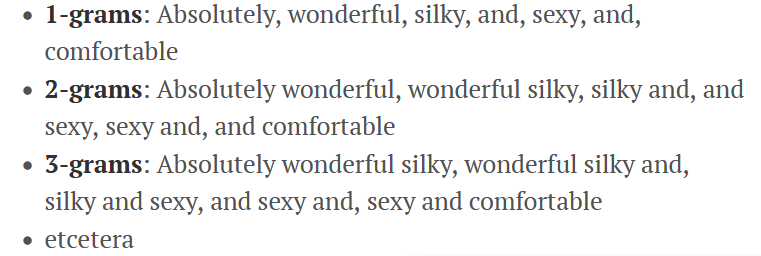

### Bigram

In [145]:
vectorizer = CountVectorizer(lowercase=True,stop_words='english',
                                   ngram_range=(2,2))
content = [
    'How to format my hard disk',
    'Hard disk format problems',
    'My hard disk is not working',
    'I forgot my external hard disk'
]
X = vectorizer.fit_transform(content)

In [146]:
vectorizer.get_feature_names()

['disk format',
 'disk working',
 'external hard',
 'forgot external',
 'format hard',
 'format problems',
 'hard disk']

In [149]:
X.toarray()

array([[0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1]], dtype=int64)

In [150]:
pd.DataFrame(data=X.toarray(), index=content, columns = vectorizer.get_feature_names())

,disk format,disk working,external hard,forgot external,format hard,format problems,hard disk
How to format my hard disk,0,0,0,0,1,0,1
Hard disk format problems,1,0,0,0,0,1,1
My hard disk is not working,0,1,0,0,0,0,1
I forgot my external hard disk,0,0,1,1,0,0,1


### Trigrams

In [151]:
vectorizer = CountVectorizer(lowercase=True,stop_words='english',
                                   ngram_range=(3,3))
content = [
    'How to format my hard disk',
    'Hard disk format problems',
    'My hard disk is not working',
    'I forgot my external hard disk'
]
X = vectorizer.fit_transform(content)

In [152]:
vectorizer.get_feature_names()

['disk format problems',
 'external hard disk',
 'forgot external hard',
 'format hard disk',
 'hard disk format',
 'hard disk working']

In [153]:
X.toarray()

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0]], dtype=int64)

In [154]:
pd.DataFrame(data=X.toarray(), index=content, columns = vectorizer.get_feature_names())

,disk format problems,external hard disk,forgot external hard,format hard disk,hard disk format,hard disk working
How to format my hard disk,0,0,0,1,0,0
Hard disk format problems,1,0,0,0,1,0
My hard disk is not working,0,0,0,0,0,1
I forgot my external hard disk,0,1,1,0,0,0


## TF-IDF

<b>TF = Term Frequency and IDF = Inverse Document Frequency</b>

TF-Idf counts term frequencies for every post and in addition discount those that appear in many posts. In other words, we want a high value for a given term in a given value, if that term occurs often in that particular post and very seldom anywhere else. In short, TF-IDF computes the weight of a word in a specific document, taking into account the overall distribution of words.

### How to Compute:

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

#### TF
Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

- $$TF(t) = \frac{Number\;of\;times\;term\;t\;appears\;in\;a\;document}{Total\;number\;of\;terms\;in\;the\;document}$$


#### IDF

Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as “is”, “of”, and “that”, may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

- $$IDF(t) = log\left( \frac{Total\;number\;of\;documents}{Number\;of\;documents\;where\;the\;term\;appears} \right)$$

#### Example: 

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

### Using TfidfTransformer to computed the tf-idf weighted document-term matrix

The <b>TfidfTransformer</b> transforms a count matrix to a normalized tf or tf-idf representation. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [155]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [157]:
content = [
    'How to format my hard disk',
    'Hard disk format problems',
    'My hard disk is not working',
    'I forgot my external hard disk'
]

In [203]:
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english')
word_count_vector = count_vectorizer.fit_transform(content)

In [204]:
word_count_vector.toarray()

array([[1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [195]:
pipeline['tfidf'].idf_

array([1.        , 1.91629073, 1.91629073, 1.51082562, 1.        ,
       1.91629073, 1.91629073])

In [199]:
pd.DataFrame(pipeline['tfidf'].idf_, index=pipeline['count_vectorizer'].get_feature_names(), columns = ['idf_weights'])

,idf_weights
disk,1.000000
external,1.916291
forgot,1.916291
format,1.510826
hard,1.000000
problems,1.916291
working,1.916291


In [209]:
df_cv = pd.DataFrame(word_count_vector.toarray(), index=content, columns=count_vectorizer.get_feature_names())
df_cv

,disk,external,forgot,format,hard,problems,working
How to format my hard disk,1,0,0,1,1,0,0
Hard disk format problems,1,0,0,1,1,1,0
My hard disk is not working,1,0,0,0,1,0,1
I forgot my external hard disk,1,1,1,0,1,0,0


### Computing the idf values

In [210]:
tfidf = TfidfTransformer()
tfidf.fit(word_count_vector)

TfidfTransformer()

In [211]:
df_idf = pd.DataFrame(tfidf.idf_, index=count_vectorizer.get_feature_names())
df_idf

,0
disk,1.000000
external,1.916291
forgot,1.916291
format,1.510826
hard,1.000000
problems,1.916291
working,1.916291


Here, notice that the words 'disk' and 'hard' appears to have the lowest idf values. This is expected as these words appear in each and every document in our collection. The lower the IDF value of a word, the less unique it is to any particular document. 

#### Computing the Tf-idf score for our documents

In [224]:
word_count_vector.toarray()

array([[1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [225]:
tf_idf_vector = tfidf.transform(word_count_vector)

In [226]:
tf_idf_vector.toarray()

array([[0.48322183, 0.        , 0.        , 0.73006392, 0.48322183,
        0.        , 0.        ],
       [0.35455723, 0.        , 0.        , 0.53567415, 0.35455723,
        0.67943473, 0.        ],
       [0.41988018, 0.        , 0.        , 0.        , 0.41988018,
        0.        , 0.8046125 ],
       [0.32713399, 0.62688384, 0.62688384, 0.        , 0.32713399,
        0.        , 0.        ]])

In [227]:
feature_names = count_vectorizer.get_feature_names()
feature_names

['disk', 'external', 'forgot', 'format', 'hard', 'problems', 'working']

In [236]:
content[0]

'How to format my hard disk'

In [229]:
first_document_vector = tf_idf_vector[0]
first_document_vector.toarray()

array([[0.48322183, 0.        , 0.        , 0.73006392, 0.48322183,
        0.        , 0.        ]])

In [235]:
pd.DataFrame(first_document_vector.T.todense(),index=feature_names)

,0
disk,0.483222
external,0.000000
forgot,0.000000
format,0.730064
hard,0.483222
problems,0.000000
working,0.000000


The above dataframe, shows the Tf-idf scores of the first document.

Notice that only disk, format and hard have scores. This is because our first document is 'How to format my hard disk'. All the words in this document have a tf-idf score and everything else shows up as zeroes. 

The scores above make sense. The more common the word across documents, the lower its score and the more unique a word is to our first document (e.g:- 'format') the higher the score.

## Using TfidfVectorizer

<b>Note: TfidfVectorizer = CountVectorizer + TfidfTransformer </b>

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [238]:
content

['How to format my hard disk',
 'Hard disk format problems',
 'My hard disk is not working',
 'I forgot my external hard disk']

In [244]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')

In [245]:
X = vectorizer.fit_transform(content)

In [246]:
X.toarray()

array([[0.48322183, 0.        , 0.        , 0.73006392, 0.48322183,
        0.        , 0.        ],
       [0.35455723, 0.        , 0.        , 0.53567415, 0.35455723,
        0.67943473, 0.        ],
       [0.41988018, 0.        , 0.        , 0.        , 0.41988018,
        0.        , 0.8046125 ],
       [0.32713399, 0.62688384, 0.62688384, 0.        , 0.32713399,
        0.        , 0.        ]])

In [247]:
vectorizer.get_feature_names()

['disk', 'external', 'forgot', 'format', 'hard', 'problems', 'working']

In [248]:
pd.DataFrame(X.toarray(), index=content, columns=vectorizer.get_feature_names())

,disk,external,forgot,format,hard,problems,working
How to format my hard disk,0.483222,0.000000,0.000000,0.730064,0.483222,0.000000,0.000000
Hard disk format problems,0.354557,0.000000,0.000000,0.535674,0.354557,0.679435,0.000000
My hard disk is not working,0.419880,0.000000,0.000000,0.000000,0.419880,0.000000,0.804612
I forgot my external hard disk,0.327134,0.626884,0.626884,0.000000,0.327134,0.000000,0.000000
